# Loosely Coherent vs. Semi-Coherent Measure

So far I have computed what Dergachev calls a *semi-coherent* measure of the signal power, obtained by averaging over the phase information in the somewhat curious way that Keith uses. Dergachev expresses it (more clearly the Keith) as
$$\left<P\right>=\left< \sum_{k=1}^{N} \sum_{l=1}^{N} a_k^* a_l e^{i(\phi_k - \phi_l)} \right> = \sum_{k=1}^{N} |a_k|^2, $$
where I have replaced Dergachev's expectation sysmbol with Keith's.

So Dergachev calls the expression inside the middle set of expectation brackets the *coherent* sum and the final expression the *semi-coherent* sum.

The problem with the semi-coherent sum is that it throws away the phase information and this weakens the power of the search for a signal. Dergachev's idea is to add back in some of the phase information to make a *loosely-coherent* sum. This is how he comes up with the statistic
$$\left<P\right>=\sum_{k=1}^{N} \sum_{l=1}^{N} a_k^* a_l \left( \dfrac{\sin(\delta)}{\delta} \right)^{|k-l|}$$
where instead of averaging over all possible phases he has averaged over only those phases that are within $\delta$ of each other. That is, $\{ \phi_l : |\phi_{l+1} - \phi_l | < \delta \}$. It is interesting to note that there appears to be no guarantee that the resulting value will be real and no guidance as to what you do with a complex value.

This gets us to where Clare is, with a set of complex $a_j$'s and their complex conjgates. She then builds a square array $A_{jk}=a_j^* a_k$. Summing only the diagonal yields the semi-coherent sum. Including off-diagonal elements (weighted by the sinc) takes her to the loosely-coherent sum. The idea seems to be to weaken the specificity of the template process so that fewer templates are needed to search a given volume of parameter space. This seems to be a claim that we can investigate.

## The $\mathbf{K}$ Matrix

It is worth noting that Dergachev points out an alternate way to view this statistic. Writing $K_kl = \left( \dfrac{\sin(\delta)}{\delta} \right)^{|k-l|}$ we can see the sum as finding a matrix element of the matrix $\mathbf{K}$ in the $a_j$ basis. That is 
$$\left<P\right>=\vec{a}^{+} \mathbf{K} \vec{a}$$
where I had to use the $+$ symbol for the Hermitian conjugate because Latex does not provide the normal dagger.

This means that it is interesting to look at the $\mathbf{K}$ matrix for various values of $\delta$. In the limit $\delta = 0$, $\dfrac{\sin(\delta)}{\delta}=1$ and  $\mathbf{K}$ is a full matrix of 1s. In the limit $\delta \rightarrow \infty$, $\dfrac{\sin(\delta)}{\delta}=0$ and $\mathbf{K}$ becomes the identity matrix, degrading the loosely-coherent sum to the semi-coherent sum. For values in between the matrix is more or less strongly diagonal, though the main-diagonal values are always 1.

Here's a little function to create such a matrix given a dimensionality and a value of $\delta$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# In this version the delta angle is given in radians
def makeKrad(delta, nPoint = 10):
    K = np.identity(nPoint, dtype=float)
    f = np.sin(delta)/delta
    for i in range(nPoint):
        for j in range(i+1, nPoint):
            k = f ** (j - i)
            K[i,j] = k
            K[j,i] = k
    return K
               
# In this version the delta angle is given in degrees
def makeKdeg(delta, nPoint = 10):
    return makeKrad(np.pi * delta / 180, 10)

print(makeKrad(0.1, nPoint=6))

[[1.         0.99833417 0.99667111 0.99501082 0.9933533  0.99169854]
 [0.99833417 1.         0.99833417 0.99667111 0.99501082 0.9933533 ]
 [0.99667111 0.99833417 1.         0.99833417 0.99667111 0.99501082]
 [0.99501082 0.99667111 0.99833417 1.         0.99833417 0.99667111]
 [0.9933533  0.99501082 0.99667111 0.99833417 1.         0.99833417]
 [0.99169854 0.9933533  0.99501082 0.99667111 0.99833417 1.        ]]


In [5]:
print(makeKrad(1.0, nPoint=6))

[[1.         0.84147098 0.70807342 0.59582324 0.50136797 0.4218866 ]
 [0.84147098 1.         0.84147098 0.70807342 0.59582324 0.50136797]
 [0.70807342 0.84147098 1.         0.84147098 0.70807342 0.59582324]
 [0.59582324 0.70807342 0.84147098 1.         0.84147098 0.70807342]
 [0.50136797 0.59582324 0.70807342 0.84147098 1.         0.84147098]
 [0.4218866  0.50136797 0.59582324 0.70807342 0.84147098 1.        ]]


In [6]:
print(makeKrad(2.0, nPoint=6))

[[1.         0.45464871 0.20670545 0.09397837 0.04272714 0.01942584]
 [0.45464871 1.         0.45464871 0.20670545 0.09397837 0.04272714]
 [0.20670545 0.45464871 1.         0.45464871 0.20670545 0.09397837]
 [0.09397837 0.20670545 0.45464871 1.         0.45464871 0.20670545]
 [0.04272714 0.09397837 0.20670545 0.45464871 1.         0.45464871]
 [0.01942584 0.04272714 0.09397837 0.20670545 0.45464871 1.        ]]


So that gives us a sense that we need quite large deltas to get away from the full matrix in this small case. With a much larger matrix we would be able to use smaller values and still be excluding large regions of the total sum.

# The $\mathbf{A}$ Matrix

The $\mathbf{A}$ matrix is the matrix built from the results of applying the templating process to the signal (with or without noise) according to the rule
$$A_{jk}=a_j^* a_k$$
The trace of this matrix is the semi-coherent measure of the signal-power. The loosely-coherent measure adds in off-diagonal elements but weights them by the $\mathbf{K}$ matrix, essentially a measure of how far off the diagonal you want to go.



Let's look at the $\mathbf{A}$ matrix for our canonical simple case. We first note that two things go into making the $\mathbf{A}$ matrix, the actual data stream, or rather its SFTs, and the template, again represented by its normalized SFTs.

Here is the signal from Clare6

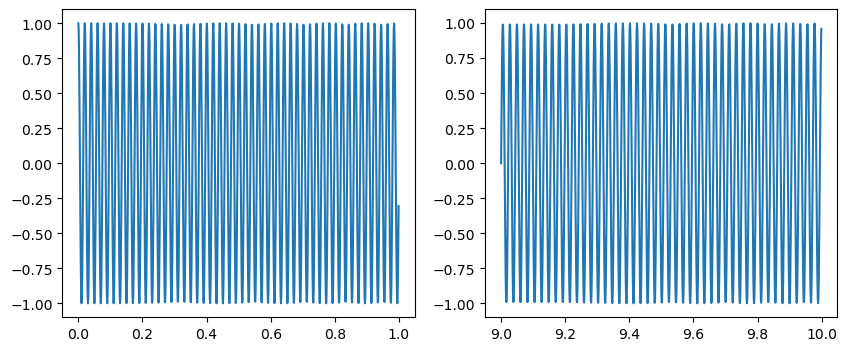

In [75]:
rate=1_000
duration=10
nSample = rate * duration
time = np.linspace(0, duration, num=nSample, endpoint=False)
freq0 = 50.0
freqDot = -0.5
w0 = 2 * np.pi * freq0
wDot = np.pi * freqDot    # only pi because dt^2/dt=2t
sig = np.cos((w0 + wDot * time) * time)
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.plot(time[:1000], sig[:1000])
ax2 = fig.add_subplot(122)
ax2.plot(time[-1000:], sig[-1000:])

and we can see the slight slowdown in the lower density of wigggles in the second figure.

## The SFTs

We have to split this into section and transform those sections to get the SFT representation of the signal.

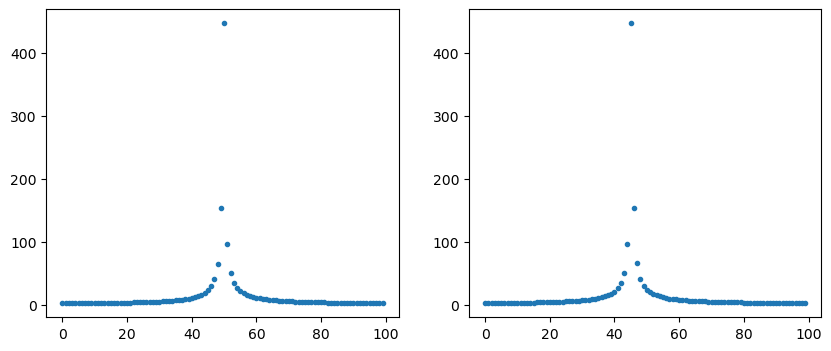

In [76]:
nFrame = 10
nShort = int(nSample / nFrame)
frames = np.reshape(sig, (nFrame, nShort), order='A')
SFTs = np.fft.rfft(frames, axis=1)
nFreq = SFTs.shape[1]
shortFreq = np.linspace(0, 1/(time[2]-time[0]), num=nFreq)
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
plt.plot(shortFreq[:100], np.absolute(SFTs[0, :100]), '.')
ax2 = fig.add_subplot(122)
plt.plot(shortFreq[:100], np.absolute(SFTs[9, :100]), '.')

Again, we see the shift of the center frequency from around 50 Hz in the left figure to 45 Hz in the right figures.

Together, those SFTs can be visualized as a spectrogram (abbreviated to leave out the uninteresting higher frequencies). First some tools.

In [77]:
#
#   Helper for range-restricted plots
#
def _extractRange(plot_range):
    rmin = 0
    rmax = -1
    if plot_range is not None:
        if isinstance(plot_range, int):
            rmax = plot_range
        elif isinstance(plot_range, tuple):
            if not isinstance(plot_range[0], int):
                raise ValueError('Invalid plot range min')
            if not isinstance(plot_range[1], int):
                raise ValueError('Invalid plot range max')
            rmin = plot_range[0]
            rmax = plot_range[1]
    return (rmin, rmax)

def plotAbsSpectrogram(matrix, plot_range=None):
    gmin, gmax = _extractRange(plot_range)
    print(f'AbsSpect {gmin}:{gmax}')
    # iData = np.zeros((self.nFrame, self.nFreq))
    iData = np.zeros_like(matrix, dtype=float)
    # print(f'iData {nFreq}:{self.nFrame}')
    nfrm = matrix.shape[0]
    for i in range(nfrm):
        # iData[:, i] = np.absolute(matrix[:, i])
        iData[i, :] = np.absolute(matrix[i, :])
    print(f'Data size {iData[:, gmin:gmax].shape}')
#        ax.matshow(np.log10(iData[gmin:gmax, :] + 1.0e-10), cmap='plasma')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(iData[:, gmin:gmax], cmap='plasma', norm='log')
    ax.set_ylabel('Time slice')
    ax.set_xlabel('Frequency (Hz)')


Then the spectrogram for our data. Note that my spectrograms are rotated clockwise 90 degrees from Clare's.

AbsSpect 20:80
Data size (10, 60)


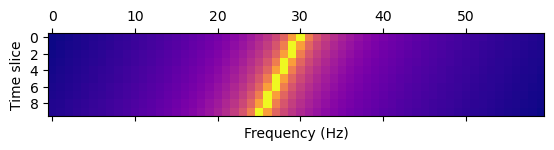

In [78]:
plotAbsSpectrogram(SFTs, plot_range=(20,80))

We clearly see the energy localized in a diagonal band that moves to lower frequencies at later times. The frequency scale is confused because I clipped the bottom 20 Hz off the data and matplotlib does not know that so 30 Hz on this scale corresponds to 30 + 20 = 50 Hz in the data.

## The Templates

Now we need to build templates. We start with a matched template to understand the procedure and then write a function to encapsulate the process of building a template.

The template is built from a noise-free signal using the same process as the SFTs to make a spectrogram. The FTs for the individual time slices are then normalized so that their squared sums are all set to 1.

In [79]:
totals = np.sum(SFTs.conjugate() * SFTs, axis=1)
print(totals)
templates = SFTs.copy()
for frame in range(nFrame):
    templates[frame, :] /= np.sqrt(totals[frame])
print(np.sum(templates.conjugate() * templates, axis=1))

[250253.77083188-5.76832228e-12j 249753.79694576-7.22006988e-12j
 250253.95104977-3.38054119e-12j 249753.97881509+3.01474241e-12j
 250254.14355295-3.62495723e-12j 249754.17311181+5.01465232e-12j
 250254.34943903+5.96759552e-12j 249754.38094916-7.24518774e-13j
 250254.5699295 +5.17969749e-12j 249754.60356637+6.50078046e-12j]
[1.+1.59424484e-17j 1.-8.36058262e-18j 1.-1.59947199e-17j
 1.+4.62392622e-18j 1.+1.32334656e-17j 1.+1.00587001e-17j
 1.-2.26367933e-17j 1.+2.29290047e-17j 1.-8.91954167e-18j
 1.+2.14928573e-17j]


So the templates are now all appropriately normalized to within the accuracy of the double precision representation.

Now we need a function to built a proper template from a description of the signal.

In [81]:
# Signal has magnitude 1 and we specify the starting frequency,
# rate of change of frequency, and starting phase.
# There are also default arguments to set the parameters of rate, duration, 
# and number of frames.
# Note that we return the template conjugates because they are all we ever need.
def makeTemplate(f, fdot, phase = 0, rate=1_000, duration=10, nFrame=10):
    # Build template signal
    nSample = rate * duration
    time = np.linspace(0, duration, num=nSample, endpoint=False)
    w0 = 2 * np.pi * f
    wDot = np.pi * fdot
    tsig = np.cos((w0 + wDot * time) * time + phase)
    # Split into frames and make template SFTs
    nShort = int(nSample / nFrame)
    frames = np.reshape(tsig, (nFrame, nShort), order='A')
    tSFTs = np.fft.rfft(frames, axis=1)
    # Normalize template SFTs
    totals = np.sum(tSFTs.conjugate() * tSFTs, axis=1)
    templates = tSFTs.copy()
    for frame in range(nFrame):
        templates[frame, :] /= np.sqrt(totals[frame])
    return templates.conjugate()

Test by making templates that match our original signal and comparing with the templates made by hand.

In [82]:
ntemp = makeTemplate(freq0, freqDot)
print(np.sum(ntemp * templates, axis=1))
print(np.sum(np.sum(ntemp * templates, axis=1)))

[1.+1.59424484e-17j 1.-8.36058262e-18j 1.-1.59947199e-17j
 1.+4.62392622e-18j 1.+1.32334656e-17j 1.+1.00587001e-17j
 1.-2.26367933e-17j 1.+2.29290047e-17j 1.-8.91954167e-18j
 1.+2.14928573e-17j]
(10+3.2368764841319726e-17j)


So all dot products sum to 1 which is a very strong indication that we are good.

Now make a pair of SLIGHTLYL different templates (one differing in f0 and one in slope) and repeat test.

In [86]:
ntemp1 = makeTemplate(freq0+0.1, freqDot)
print(np.sum(ntemp1 * templates, axis=1))
print(np.sum(np.sum(ntemp1 * templates, axis=1)))

[ 0.93549357-0.30422453j  0.57979273-0.79358812j -0.00268191-0.98247405j
 -0.57580901-0.79471611j -0.93575159-0.30249157j -0.93568791+0.3038717j
 -0.57695213+0.79599637j -0.00351384+0.98120256j  0.58008686+0.79309259j
  0.93501874+0.3029539j ]
(-4.473405089133742e-06-0.0003772692697828206j)


In [87]:
ntemp2 = makeTemplate(freq0, freqDot+0.01)
print(np.sum(ntemp2 * templates, axis=1))
print(np.sum(np.sum(ntemp2 * templates, axis=1)))

[ 0.99990187-0.01046221j  0.99694151-0.07319465j  0.97928825-0.19717096j
  0.92410731-0.37632849j  0.79979083-0.59396695j  0.57799121-0.8084473j
  0.23432608-0.96359336j -0.19231317-0.96935808j -0.6394895 -0.75195196j
 -0.93970315-0.2937003j ]
(3.7408412483070035-5.038174265654128j)


In [88]:
ntemp3 = makeTemplate(freq0, freqDot+0.03)
print(np.sum(ntemp3 * templates, axis=1))
print(np.sum(np.sum(ntemp3 * templates, axis=1)))

[ 0.9991166 -0.03137661j  0.97268222-0.21720902j  0.81917737-0.55684948j
  0.39256339-0.89856138j -0.33084927-0.91113684j -0.917097  -0.26549139j
 -0.61994664+0.70472561j  0.51331677+0.75780524j  0.77120367-0.45734784j
 -0.53101479-0.68625508j]
(2.06915233873148-2.5616967804828663j)


Those appear to behave in the sorts of ways that I would expect, at least for the real parts. I am less sure what I would expect of the imaginary parts.

## Figure of Merit

OK, so the figure of merit is then formed using a template spectrogram and a signal spectrogram by first creating an $\vec{a}$ vector by dotting the template for each frame with the SFT for that frame and assembling the values into an \<nFrame\> long vector. Then the A matrix is formed from the outer product of $\vec{a}$ with its conjugate.

In [89]:
def makeA(sigFTs, tempConj):
    a_vec = np.sum(tempConj * sigFTs, axis=1)
    print(np.vdot(a_vec, a_vec))
    A = np.outer(a_vec.conjugate(), a_vec)
    return A

Then in the simplest "semi-coherent" method we simply sum the diagonal elements of A to produce our figure of merit (take the trace of A).

In [90]:
def semiCoherentFOM(sigFTs, tempConj):
    A_mat = makeA(sigFTs, tempConj)
    return np.trace(A_mat)

Let's test by first running the algorithm with our signal and the correct template. Noting that we already have the SFTs and the template.

In [91]:
best = semiCoherentFOM(SFTs, ntemp.conjugate())
print(best)

(2364490.0831993576-2.7504098857779522e-11j)
(2364490.0831993576+1.3699312343516124e-11j)


Then try with our slightly modified templates.

In [92]:
nextbest1 = semiCoherentFOM(SFTs, ntemp1.conjugate())
print(nextbest1)

(2288631.0382851018+4.647568731912782e-12j)
(2288631.0382851018+4.717588702646036e-14j)


In [93]:
nextbest2 = semiCoherentFOM(SFTs, ntemp2.conjugate())
print(nextbest2)

(2341577.094470808-5.820684775313361e-11j)
(2341577.0944708083+1.610787895206266e-12j)


In [94]:
nextbest3 = semiCoherentFOM(SFTs, ntemp3.conjugate())
print(nextbest3)

(2155410.871594679-9.26819188072658e-12j)
(2155410.871594679-9.91026028987823e-13j)


So we see that the trace matches the magnitude squared of $\vec{a}$, as it should, and that the further away we get, the smaller the FOM gets.

## How fast does the semi-coherent FOM fall?

With these tools we ought to be able to plot the fall of the FOM as we get further from the ideal template in both f0 and fdot.

For my fairly short (1s) frames, my frequency resolution is on the order of 1 Hz so let's examine the frequency space 1H up and down from the ideal value.

(60271.29449102425+5.482099029527859e-13j)
(87401.67584258743+4.480222777331421e-13j)
(184301.77849793292+1.7630095264882255e-12j)
(368246.9990571933-3.134871197626588e-12j)
(641655.2120816887-1.7503422732329468e-12j)
(990439.9319736272-4.858882777862194e-12j)
(1375449.0061636046-2.682126537434896e-12j)
(1755103.168721816+1.6133807313073875e-11j)
(2075763.29687519+2.0310543566908377e-11j)
(2289803.294759026+1.8061713320979152e-11j)
(2364490.0831993576-2.7504098857779522e-11j)
(2288631.0382851018+4.647568731912782e-12j)
(2073502.9991036449-3.512592098031756e-11j)
(1752212.4638727442+2.394966610745571e-11j)
(1372024.7818803745+2.318750150406269e-12j)
(983345.5491175737-1.0731931398000543e-11j)
(638376.6251064747+7.506556127109645e-12j)
(365586.1871971505+1.423953133644968e-12j)
(182428.05528120417-1.5931654657240053e-13j)
(86485.39536977695+3.369180121174382e-13j)
(60282.87154565093+7.75497783594895e-13j)


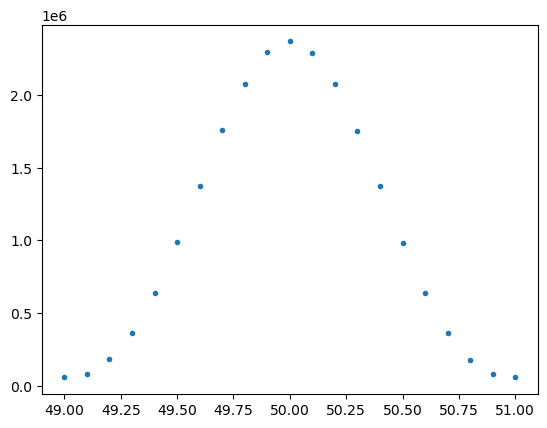

In [98]:
lowf = freq0 - 1
highf = freq0 + 1
freqs = np.linspace(lowf, highf, 21)
fom = np.zeros_like(freqs)
for i, f in np.ndenumerate(freqs):
    t = makeTemplate(f, freqDot)
    fom[i] = semiCoherentFOM(SFTs, t.conjugate()).real
plt.plot(freqs, fom, '.')

Well, that is rather nice. The FOM falls to zero at the next nearest actual frequency and is basically a Gaussian centered on the correct value with a FWHM slightly less than 1 Hz.

Now what if we repeat that but altering the decay rate instead of the center frequency?

(246913.91559683988-2.2734701517815327e-13j)
(272073.0973644553-2.0546238039491458e-12j)
(304590.25110511767-1.84777216928255e-12j)
(346386.258936456-2.313226367721667e-12j)
(402711.7433309467-3.67441287462528e-12j)
(478570.2329432011+1.8761710158143845e-12j)
(591918.4782098592-1.0972894429040929e-11j)
(767359.1651563802-2.6055548849082795e-13j)
(1090650.6751365263-3.3825335689105356e-12j)
(1833033.5593099552-8.155540738969114e-12j)
(2364490.0831993576-2.7504098857779522e-11j)
(1846089.3064011217+1.4971844191569446e-11j)
(1104040.35270954+7.294755357286726e-12j)
(771172.9271807432+2.898573316116226e-11j)
(592071.0603875456+1.45559559639208e-11j)
(477028.0959609486-1.1347631596416022e-12j)
(401042.86676539655-1.472944950536031e-12j)
(346362.92309473624+7.699815868154487e-12j)
(304495.42697051534-1.2020669867722986e-12j)
(271456.7258661416-6.344923380759888e-12j)
(245312.4203071963-7.769764109179288e-12j)


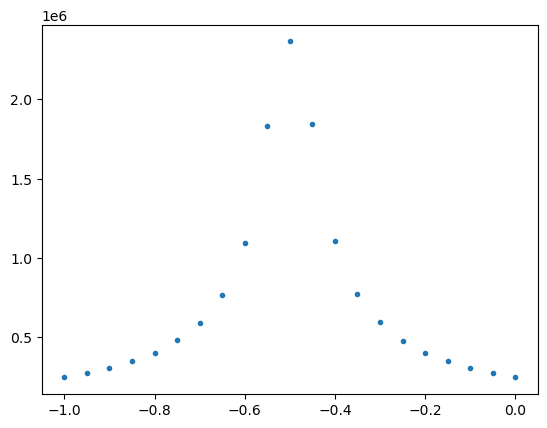

In [99]:
lowfd = freqDot - 0.5
highfd = freqDot + 0.5
freqds = np.linspace(lowfd, highfd, 21)
fomd = np.zeros_like(freqds)
for i, fd in np.ndenumerate(freqds):
    t = makeTemplate(freq0, fd)
    fomd[i] = semiCoherentFOM(SFTs, t.conjugate()).real
plt.plot(freqds, fomd, '.')

Well, the general form of the behavior is roughly similar, strongly peaked on the correct frequency. However, the shape is now mor exponential decay (and its mirror) and the FOM does not deay to such a low value. The FWHM is about 0.2 Hs/s.

## Once more with a little noise

Let's repeat with noise comparable to the signal. I am going to use Gaussian noise this time as that is what Clare has been using.

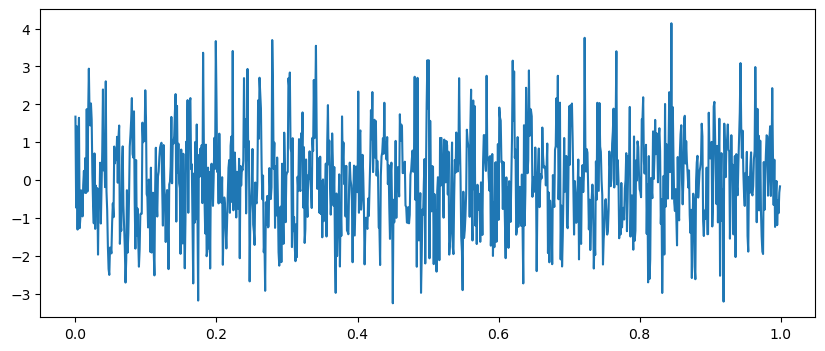

In [100]:
rng = np.random.default_rng()
noise1 = rng.normal(scale=1.0, size=nSample)
nSig1 = noise1 + sig
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(111)
ax1.plot(time[:1000], nSig1[:1000])


So at this 1:1 amplitude ratio we can still see the signal quite clearly.

Let's make the noisy SFTs and repeat the analysis.

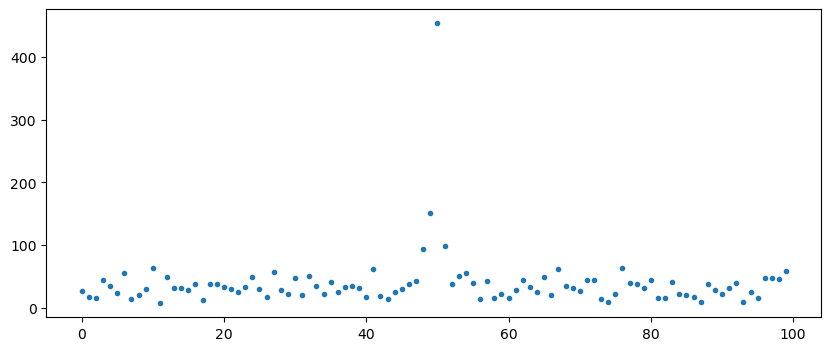

In [101]:
framesn1 = np.reshape(nSig1, (nFrame, nShort), order='A')
n1SFTs = np.fft.rfft(framesn1, axis=1)
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(111)
ax1.plot(shortFreq[:100], np.absolute(n1SFTs[0, :100]), '.')


So signal is well above noise. A simple signal-noise ratio is of order 9:1.

Now do the search plots.

(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)
(267290.24350567977-1.0015201228188073e-11j)


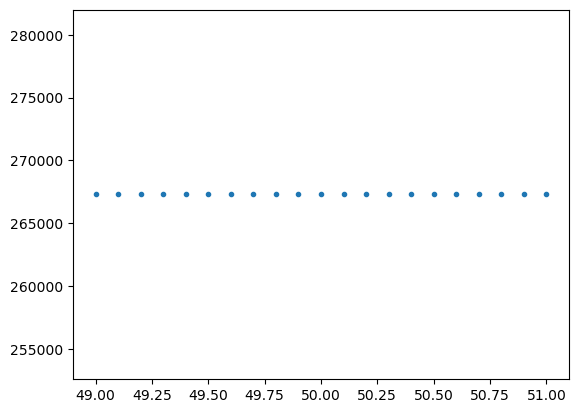

In [102]:
fomn1 = np.zeros_like(freqs)
for i, f in np.ndenumerate(freqs):
    fomn1[i] = semiCoherentFOM(n1SFTs, t.conjugate()).real
plt.plot(freqs, fomn1, '.')